# Dual Families

## Introduction

As described in [albin2019blockingdualityp](), every family of objects $\Gamma$ has a natural dual family $\hat{\Gamma}$, called the *blocker* of $\Gamma$.  These families are connected through modulus by the property that

$$
\text{Mod}_{p,\sigma}(\Gamma)^{\frac{1}{p}} =
\text{Mod}_{q,\hat{\sigma}}(\hat{\Gamma})^{\frac{1}{q}},
$$

where $p\in(1,\infty)$, $q=p/(p-1)$ is its Hölder conjugate exponent, and where $\hat{\sigma}=\sigma^{-\frac{q}{p}}$.  Moreover, the unique optimal density $\rho^*$ for the first modulus problem and $\eta^*$ for the second are related as follows.

$$
\frac{\hat{\sigma}(e)\eta^*(e)^q}{\text{Mod}_{q,\hat{\sigma}}(\hat{\Gamma})} =
\frac{\sigma(e)\rho^*(e)^p}{\text{Mod}_{p,\sigma}(\Gamma)}.
$$

This interpretation requires a specific representation of the objects $\gamma\in\Gamma$.  Namely, we identify each $\gamma\in\Gamma$ with its corresponding usage vector $\mathcal{N}(\gamma,e)$.  In this way, we think of $\Gamma\subset\mathbb{R}^E_{\ge 0}$.

Now, the set of admissible densities for the modulus of $\Gamma$ is defined through a set of linear inequalities

$$
\text{Adm}(\Gamma) := \{\rho\in\mathbb{R}^E : \rho\ge 0, \;\ell_\rho(\gamma)\ge 0\;\forall\gamma\in\Gamma\}.
$$

This is a convex set in $\mathbb{R}^{E}_{\ge 0}$, defined by finitely many linear inequalities and, therefore, it has a finite set of extreme points.  The dual family $\hat{\Gamma}$ is simply this set of extreme points, where we again use the representation of objects by their usage vectors.

On small graphs, the dual family can be computed and visualized using [pycddlib](https://pycddlib.readthedocs.io/en/latest/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg

## Example: Connecting paths

Consider, for example, the set of all paths connecting two distinct nodes $s$ and $t$.  These are called $st$-paths.  The following code generates and visualizes a list of all paths on a demo graph.  Labels on the edges show values of the usage vector.  Edges with positive usage are drawn with thicker lines.

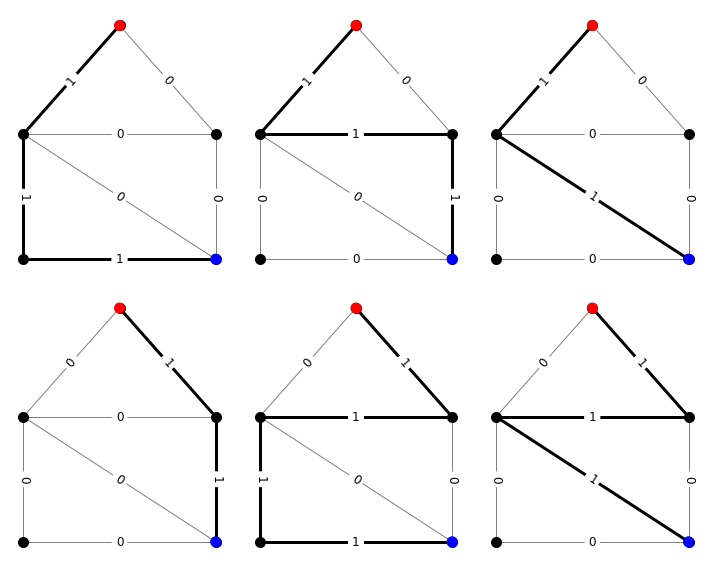

In [2]:
# the demo graph
G, pos = demo_graphs.slashed_house_graph()

# enumerate the edges
for i, (u,v) in enumerate(G.edges()):
    G[u][v]['enum'] = i
    
# find all paths between nodes 1 (red) and 3 (blue)
paths = list(nx.all_simple_paths(G, 1, 3))

plt.figure(figsize=(10,8))

# draw the paths
for i, path in enumerate(paths):
    plt.subplot(2,3,i+1)
    labels = {(u,v):0 for u,v in G.edges}
    labels.update({(path[i],path[i+1]):1 for i in range(len(path)-1)})
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
    nx.draw_networkx_nodes(G, pos, nodelist=[1, 3], node_color=['red', 'blue'], node_size=100)
plt.tight_layout()

In order to explore the extreme points of the admissible set, we need to pass between the hyperplane representation (H-representation) and the vertex representation (V-representation) of the set.  This is exactly what `cdd` was designed to do.  We begin by forming a list of inequalities defining the admissible set.  For `cdd`, we need to write our inequalities in the form $Ax \le b$ and then store them in an augmented matrix of the form $[b\;-A]$.  We have two types of constraints: $\rho\ge 0$ and $\mathcal{N}\rho\ge 1$, where $\mathcal{N}$ is the usage matrix for the family $\Gamma$.  Rewriting in the proper form, we get
$$
\begin{bmatrix}
-I \\ -\mathcal{N}
\end{bmatrix}\rho \le
\begin{bmatrix}
0 \\ -\mathbf{1}
\end{bmatrix}
$$
and, thus, the augmented matrix we need to generate is
$$
\begin{bmatrix}
0 & I \\
-\mathbf{1} & \mathcal{N}
\end{bmatrix}.
$$

In [3]:
# count the number of edges
m = len(G.edges)

# initialize an empty list of rows for the augmented matrix
rows = []

# add rows corresponding to the constraints rho >= 0
for i in range(m):
    row = (m+1)*[0]
    row[i+1] = 1
    rows.append(row)
    
# add rows corresponding to the constraints N*rho >= 1
for p in paths:
    row = [-1] + m*[0]
    for i in range(len(p)-1):
        i = G[p[i]][p[i+1]]['enum']
        row[i+1] = 1
    rows.append(row)
    
# create the polyhedron in cdd
mat = cdd.Matrix(rows, number_type='fraction')
mat.rep_type = cdd.RepType.INEQUALITY
poly = cdd.Polyhedron(mat)
print(poly)

begin
 13 8 rational
 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1
 -1 1 1 0 0 0 0 1
 -1 1 0 1 0 0 1 0
 -1 1 0 0 1 0 0 0
 -1 0 0 0 0 1 1 0
 -1 0 1 1 0 1 0 1
 -1 0 0 1 1 1 0 0
end


Next, we ask `cdd` to produce the V-representation of this polyhedron.

In [4]:
ext = poly.get_generators()
print(ext)

V-representation
begin
 13 8 rational
 1 0 0 0 1 0 1 1
 1 0 1 0 1 0 1 0
 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0
end


The V-representation contains two types of information.  Rows beginning with 1 signal an extreme point of the polyhedron, rows beginning with 0 signal an extreme direction.  Since the admissible set recedes into the positive orthant, there should always be $|E|$ of these extreme directions.  The extreme points correspond to the objects in $\hat{\Gamma}$.  The following code cell provides a visualization of these objects.  Again, we draw the graph with edges labeled by object usage and highlight edges with positive edge usage.

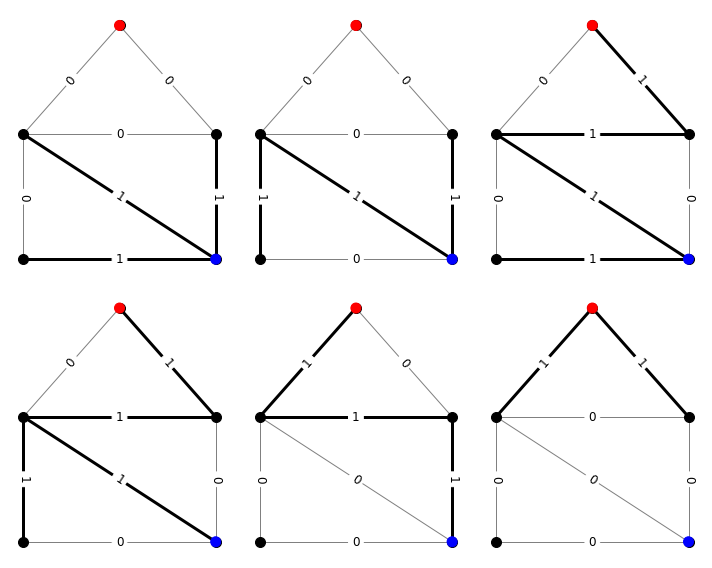

In [5]:
# list of dual objects
dual = []

# loop over extreme points and directions
for i in range(ext.row_size):
    
    # skip extreme directions
    if ext[i][0] == 0:
        continue
        
    # add the vector representation of the dual object
    dual.append(ext[i][1:])
    
plt.figure(figsize=(10,8))

# draw the blocker
for i, obj in enumerate(dual):
    plt.subplot(2,3,i+1)
    labels = {(u,v):obj[d['enum']] for u,v,d in G.edges(data=True)}
    edges = [(u,v) for u,v,d in G.edges(data=True) if obj[d['enum']] > 0]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
    nx.draw_networkx_nodes(G, pos, nodelist=[1, 3], node_color=['red', 'blue'], node_size=100)
plt.tight_layout()

There are a few important things to note here.
1. In this case, the size of $\hat{\Gamma}$ equals the size of $\Gamma$. That is coincidence.  In general, the two sets will have different sizes.
1. In this case, the usage vectors for objects in $\hat{\Gamma}$ lie in $\{0,1\}^E$.  This is also not a general property.  Only certain special families of objects have blockers with that property.  We'll see a counterexample shortly.
1. When $\Gamma$ is the family of $st$-paths, $\hat{\Gamma}$ has a very simple interpretation; it is the family of minimal $st$-cuts (with a $(0,1)$ usage matrix).  See if you can convince yourself that every minimal $st$-cut is present in the figure above.  This fact is essentially why the max-flow min-cut theorem is true, and it is sometimes helpful to think of this type of duality as a generalization of max-flow min-cut to other families of objects.

## Example: Spanning trees

Another interesting example of an object family is the family $\Gamma$ of all spanning trees of a graph (again, with the standard $(0,1)$ usage matrix).  

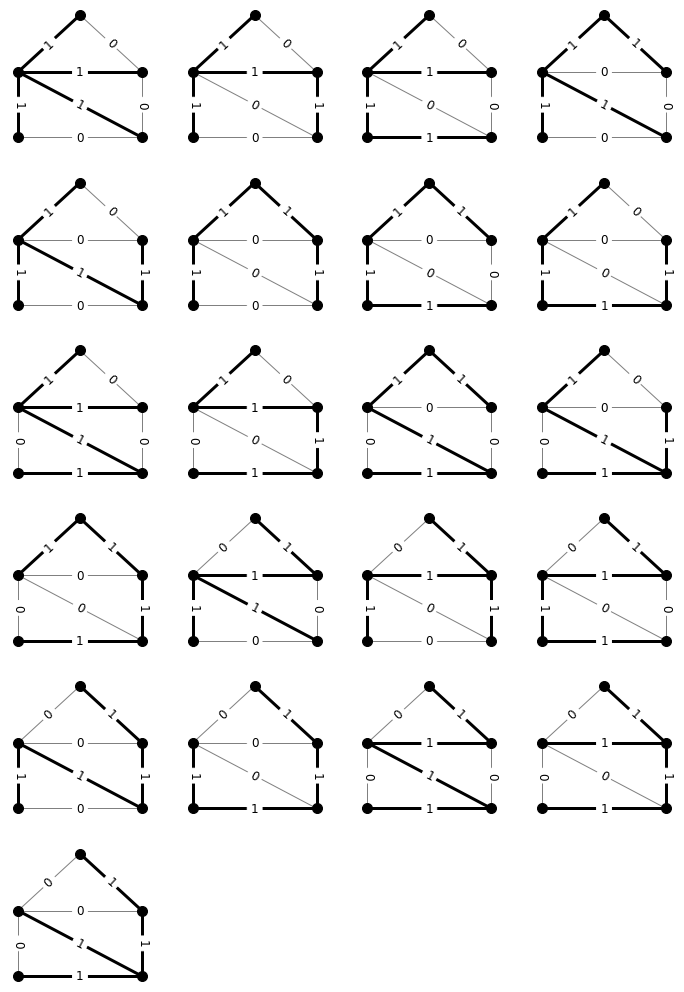

In [10]:
# get a list of spanning trees
trees = list(alg.spanning_trees(G))

# number of columns and rows for plot
ncol = 4
nrow = int(np.ceil(len(trees)/ncol))

# draw the trees
plt.figure(figsize=(3*ncol,3*nrow))
for i,tree in enumerate(trees):
    plt.subplot(nrow,ncol,i+1)
    labels = {(u,v):0 for u,v in G.edges}
    labels.update({(u,v):1 for u,v in tree})
    edges = tree
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

Here's the H-representation of the admissible densities.

In [7]:
# count the number of edges
m = len(G.edges)

# initialize an empty list of rows for the augmented matrix
rows = []

# add rows corresponding to the constraints rho >= 0
for i in range(m):
    row = (m+1)*[0]
    row[i+1] = 1
    rows.append(row)
    
# add rows corresponding to the constraints N*rho >= 1
for tree in trees:
    row = [-1] + m*[0]
    for u,v in tree:
        i = G[u][v]['enum']
        row[i+1] = 1
    rows.append(row)
    
# create the polyhedron in cdd
mat = cdd.Matrix(rows, number_type='fraction')
mat.rep_type = cdd.RepType.INEQUALITY
poly = cdd.Polyhedron(mat)
print(poly)

begin
 28 8 rational
 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1
 -1 1 1 1 1 0 0 0
 -1 1 1 1 0 0 1 0
 -1 1 1 1 0 0 0 1
 -1 1 1 0 1 1 0 0
 -1 1 1 0 1 0 1 0
 -1 1 1 0 0 1 1 0
 -1 1 1 0 0 1 0 1
 -1 1 1 0 0 0 1 1
 -1 1 0 1 1 0 0 1
 -1 1 0 1 0 0 1 1
 -1 1 0 0 1 1 0 1
 -1 1 0 0 1 0 1 1
 -1 1 0 0 0 1 1 1
 -1 0 1 1 1 1 0 0
 -1 0 1 1 0 1 1 0
 -1 0 1 1 0 1 0 1
 -1 0 1 0 1 1 1 0
 -1 0 1 0 0 1 1 1
 -1 0 0 1 1 1 0 1
 -1 0 0 1 0 1 1 1
 -1 0 0 0 1 1 1 1
end


And here's the V-representation.

In [8]:
ext = poly.get_generators()
print(ext)

V-representation
begin
 33 8 rational
 1 0 0 0 1 0 1 1
 1 0 1/2 0 1/2 0 1/2 1/2
 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1
 1 0 0 1 0 1 1 0
 1 0 0 1 1 1 0 1
 1 0 0 1/2 1/2 1/2 1/2 1/2
 1 0 1/2 1/2 1/2 1/2 0 1/2
 1 0 1 1 1 1 0 0
 1 0 1/3 1/3 1/3 1/3 1/3 1/3
 1 0 1/2 1/2 1/2 1/2 1/2 0
 1 1/2 1/2 1/2 1/2 0 0 1/2
 1 1 1 1 1 0 0 0
 1 1/3 1/3 1/3 1/3 0 1/3 1/3
 1 1/2 1/2 1/2 1/2 0 1/2 0
 1 1/4 1/4 1/4 1/4 1/4 1/4 1/4
 1 1/3 1/3 1/3 1/3 1/3 1/3 0
 1 1/2 1/2 1/2 1/2 1/2 0 0
 1 1/3 1/3 1/3 1/3 1/3 0 1/3
 1 1/3 0 1/3 1/3 1/3 1/3 1/3
 1 1/2 0 1/2 1/2 1/2 0 1/2
 1 1/2 0 1/2 1/2 0 1/2 1/2
 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 1 0
 1 1/2 0 1/2 0 1/2 1/2 0
 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0
end


Already, you can see something interesting.  Unlike in the case of connecting paths, the dual family here has usage vectors that are not just 0s and 1s.  Visualizing this set will help us get a better picture of what they are.

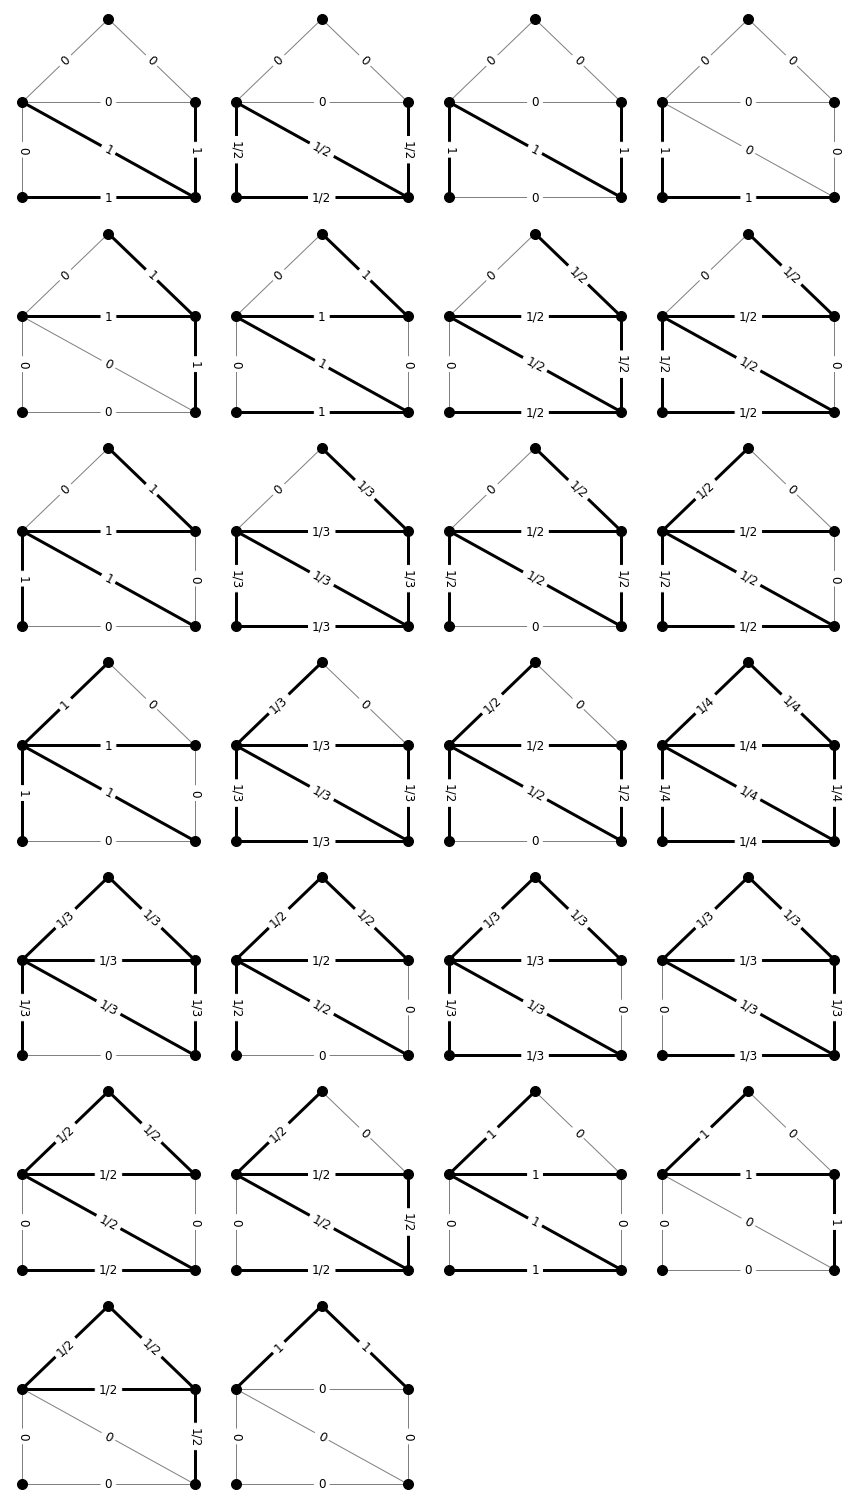

In [11]:
# list of dual objects
dual = []

# loop over extreme points and directions
for i in range(ext.row_size):
    
    # skip extreme directions
    if ext[i][0] == 0:
        continue
        
    # add the vector representation of the dual object
    dual.append(ext[i][1:])
    
# number of columns and rows for plot
ncol = 4
nrow = int(np.ceil(len(dual)/ncol))

# draw the trees
plt.figure(figsize=(3*ncol,3*nrow))

# draw the blocker
for i, obj in enumerate(dual):
    plt.subplot(nrow,ncol,i+1)
    labels = {(u,v):obj[d['enum']] for u,v,d in G.edges(data=True)}
    edges = [(u,v) for u,v,d in G.edges(data=True) if obj[d['enum']] > 0]
    nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
plt.tight_layout()

This set of objects has an interesting interpretation, given by Chopra [chopra1989spanningtreepolyhedron]().  Consider any of the figures above.  Removing the darkened edges will disconnect the graph into $k>1$ connected components.  The weights on the edges are $1/(k-1)$.  The objects shown are all such edge sets that are minimal in the sense that removing a strict subset of the darkened edges will result in fewer connected components.  Chopra called these objects *feasible partitions*.  In this sense, the family $\Gamma$ of spanning trees (with $(0,1)$ usage matrix) is the blocking dual of the family $\hat{\Gamma}$ of feasible partitions (with usage matrix based on number of connected components just described).